In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import sys; sys.path.append('/home/mitch/github/mexico_national_accounts/')

import filters

datadir = '/home/mitch/github/mexico_national_accounts/data/'
os.chdir(datadir)
plotdir = '/home/mitch/school/twoasset/plots/'

In [2]:
df = pd.read_csv(datadir + 'processed/data.csv')
df.head(10)

,country,Date,C,X,GDP,M,I,Q,Y,time,...,GDP_growth,I_growth,C_cycle,GDP_cycle,I_cycle,TBGDP_cycle,C_linear_cycle,GDP_linear_cycle,I_linear_cycle,TBGDP_linear_cycle
0,Mexico,Q1 1993,-4.015367,0.004127,-3.538999,0.004301,-5.118032,1,1993,1993-01-01,...,NaN,NaN,-0.000789,-0.002560,-0.021161,0.000960,NaN,NaN,NaN,NaN
1,Mexico,Q2 1993,-4.000990,0.004259,-3.531515,0.004540,-5.109467,2,1993,1993-04-01,...,NaN,NaN,0.012461,0.003518,-0.003119,-0.005061,NaN,NaN,NaN,NaN
2,Mexico,Q3 1993,-3.998524,0.004351,-3.516530,0.004611,-5.083125,3,1993,1993-07-01,...,NaN,NaN,0.013800,0.017099,0.032713,-0.006647,NaN,NaN,NaN,NaN
3,Mexico,Q4 1993,-3.978311,0.004560,-3.498568,0.004895,-5.005489,4,1993,1993-10-01,...,NaN,NaN,0.032881,0.033657,0.119869,-0.011413,NaN,NaN,NaN,NaN
4,Mexico,Q1 1994,-4.007029,0.004495,-3.521918,0.005032,-4.983164,1,1994,1994-01-01,...,NaN,NaN,0.003007,0.008894,0.151736,-0.020914,NaN,NaN,NaN,NaN
5,Mexico,Q2 1994,-3.969173,0.004509,-3.496359,0.005207,-4.948098,2,1994,1994-04-01,...,NaN,NaN,0.039648,0.032996,0.196287,-0.028180,NaN,NaN,NaN,NaN
6,Mexico,Q3 1994,-3.949815,0.004633,-3.483915,0.005392,-4.942700,3,1994,1994-07-01,...,NaN,NaN,0.057693,0.043903,0.210939,-0.032236,NaN,NaN,NaN,NaN
7,Mexico,Q4 1994,-3.938728,0.004827,-3.467586,0.005551,-4.968018,4,1994,1994-10-01,...,NaN,NaN,0.067308,0.058557,0.194343,-0.032944,NaN,NaN,NaN,NaN
8,Mexico,Q1 1995,-4.043817,0.004955,-3.559708,0.004134,-5.366537,1,1995,1995-01-01,...,NaN,NaN,-0.039514,-0.035466,-0.196412,0.017020,NaN,NaN,NaN,NaN
9,Mexico,Q2 1995,-4.055082,0.005407,-3.605221,0.004302,-5.491553,2,1995,1995-04-01,...,NaN,NaN,-0.052913,-0.083226,-0.315173,0.026952,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             116 non-null    object 
 1   Date                116 non-null    object 
 2   C                   116 non-null    float64
 3   X                   116 non-null    float64
 4   GDP                 116 non-null    float64
 5   M                   116 non-null    float64
 6   I                   116 non-null    float64
 7   Q                   116 non-null    int64  
 8   Y                   116 non-null    int64  
 9   time                116 non-null    object 
 10  population          116 non-null    float64
 11  log_population      116 non-null    float64
 12  TB                  116 non-null    float64
 13  TBGDP               116 non-null    float64
 14  IGDP                116 non-null    float64
 15  C_growth            0 non-null      float64
 16  GDP_grow

In [4]:
df['time'] = pd.to_datetime(df['time'])

/tmp/ipykernel_65386/2633915122.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/2633915122.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/2633915122.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/2633915122.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)


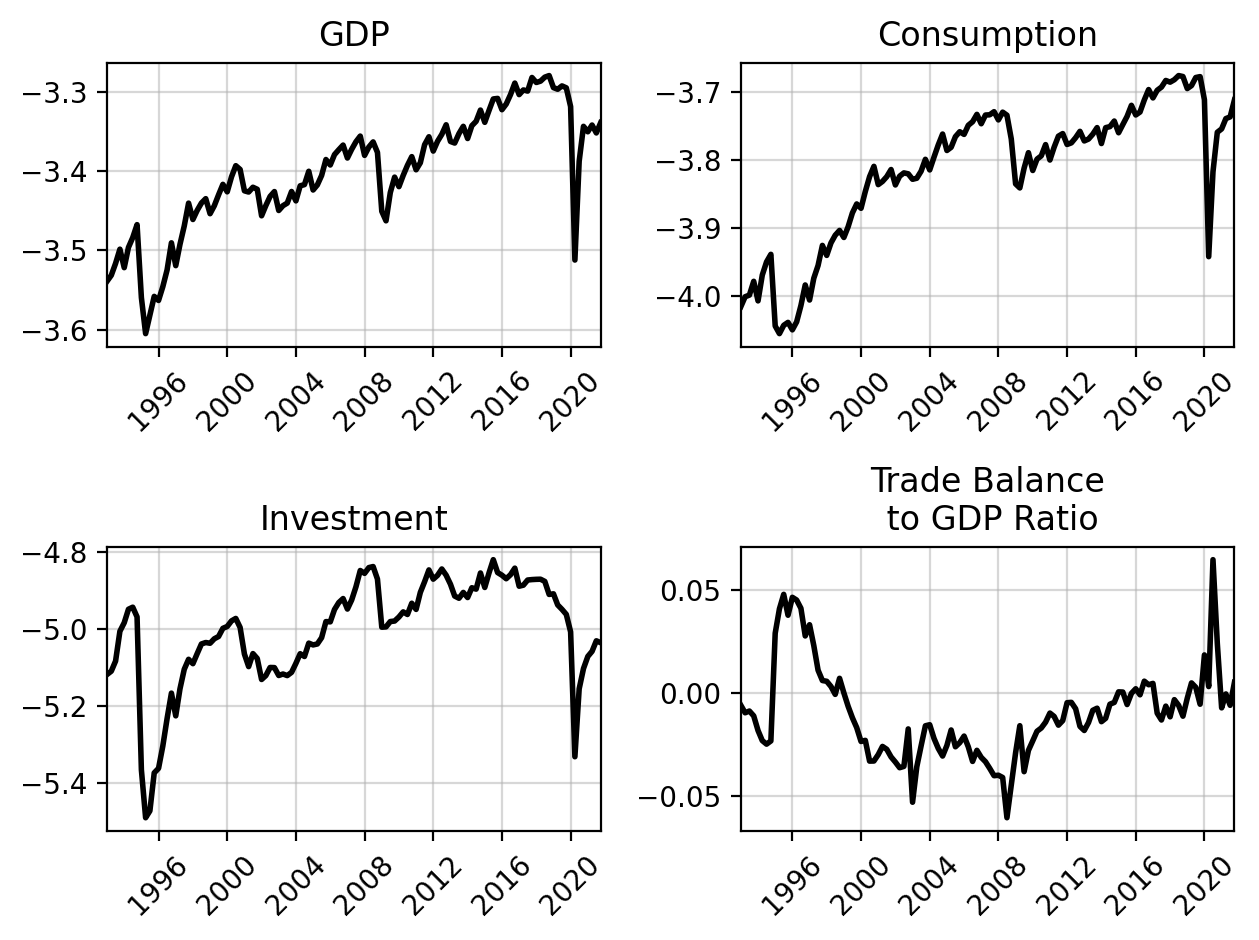

In [35]:
fig = plt.figure()

ax = plt.subplot(221)
ax.plot(df['time'], df['GDP'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(df['time'], df['C'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(df['time'], df['I'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(df['time'], df['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

/tmp/ipykernel_65386/1136158001.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/1136158001.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/1136158001.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/tmp/ipykernel_65386/1136158001.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)


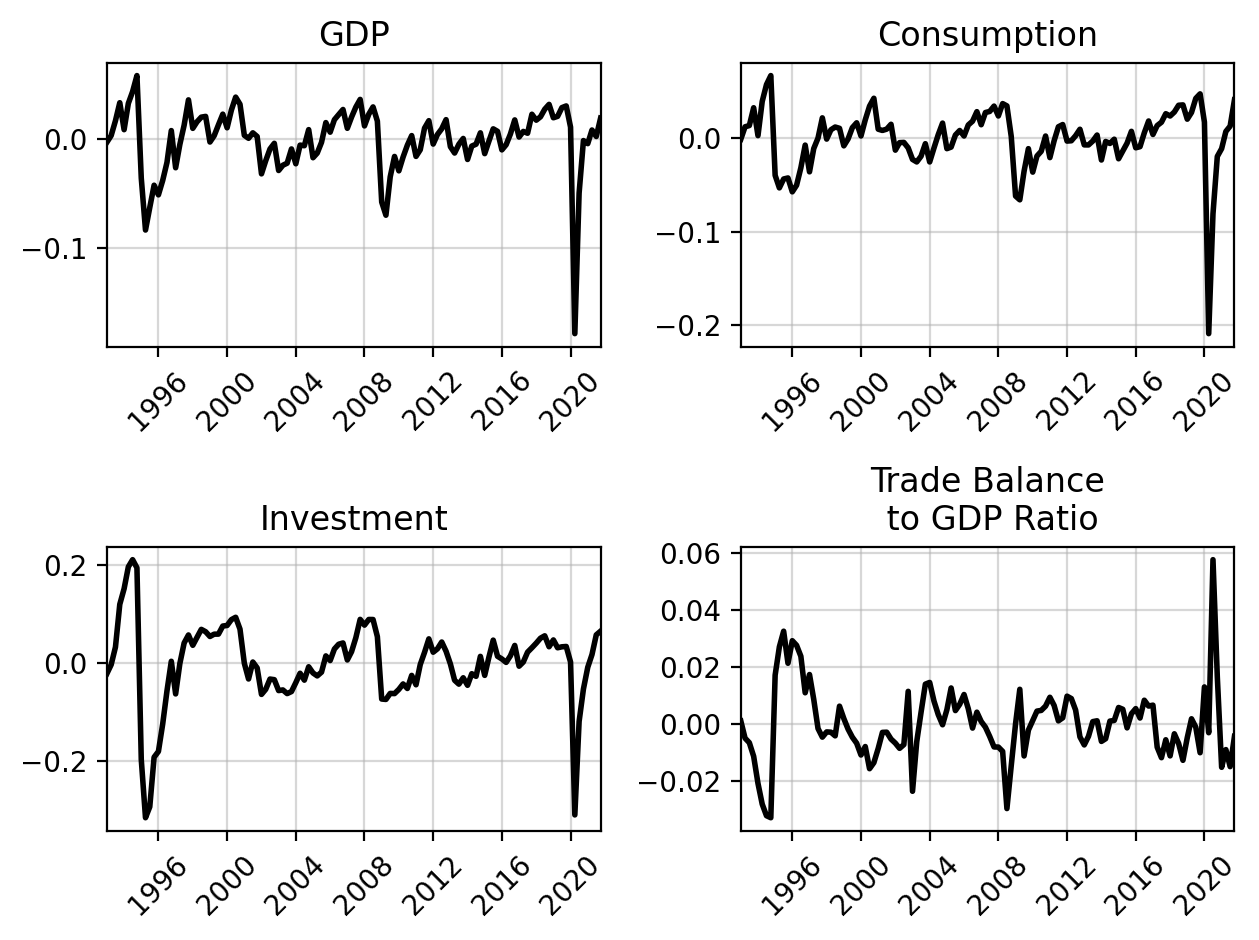

In [36]:
fig = plt.figure()

ax = plt.subplot(221)
ax.plot(df['time'], df['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(df['time'], df['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(df['time'], df['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(df['time'], df['TBGDP_cycle'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [5]:
ymax = 1996
crisis = pd.to_datetime('1995Q2')
opt_crisis = {'linewidth':2, 'color':'red', 'alpha':0.5}
drange = pd.date_range('1993', '1996', freq='YS')
peso_crisis = df.copy().query("country == 'Mexico'").query('Y <= @ymax')

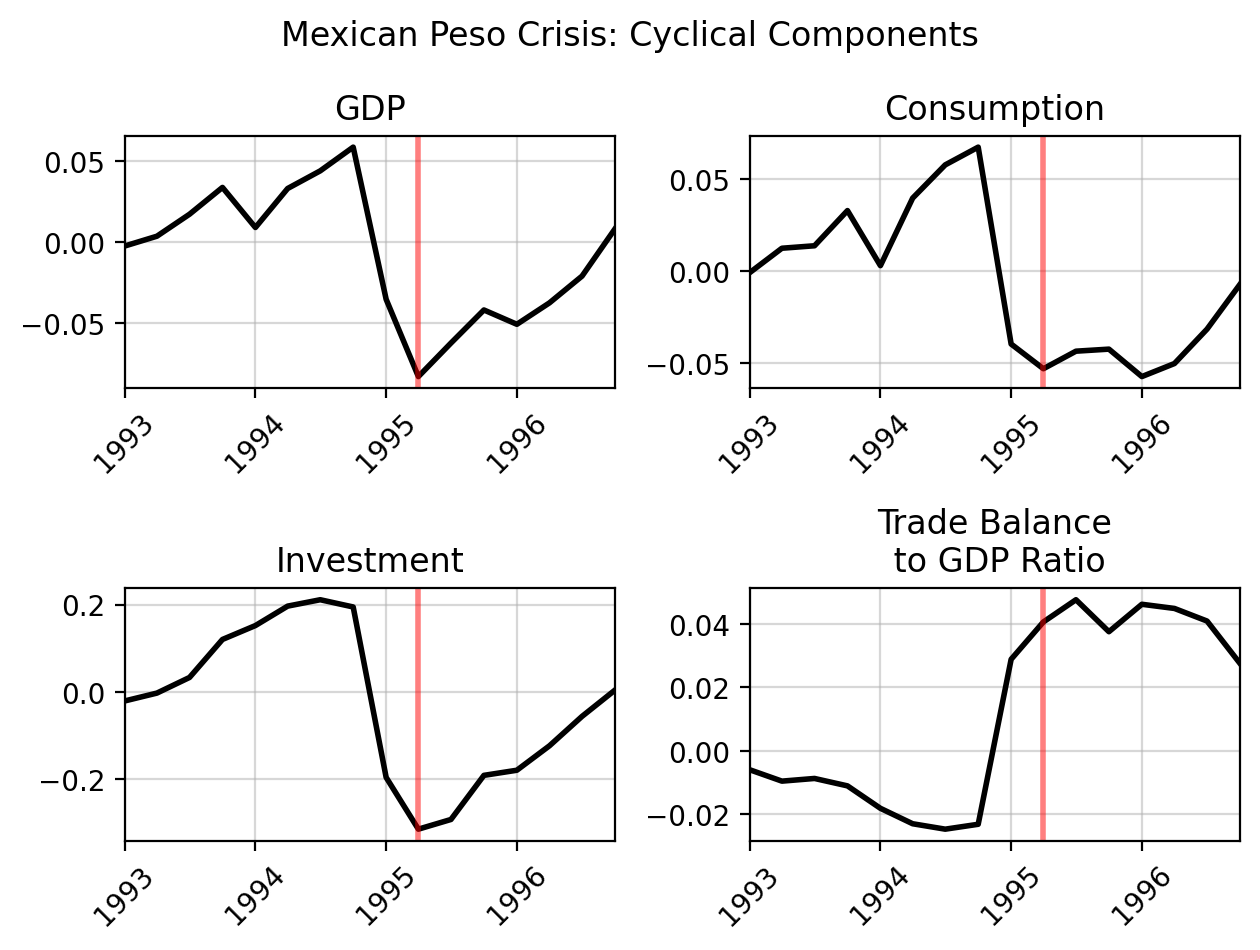

In [7]:
fig = plt.figure()

plt.suptitle("Mexican Peso Crisis: Cyclical Components")

ax = plt.subplot(221)
ax.plot(peso_crisis['time'], peso_crisis['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(peso_crisis['time'], peso_crisis['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(peso_crisis['time'], peso_crisis['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(peso_crisis['time'], peso_crisis['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

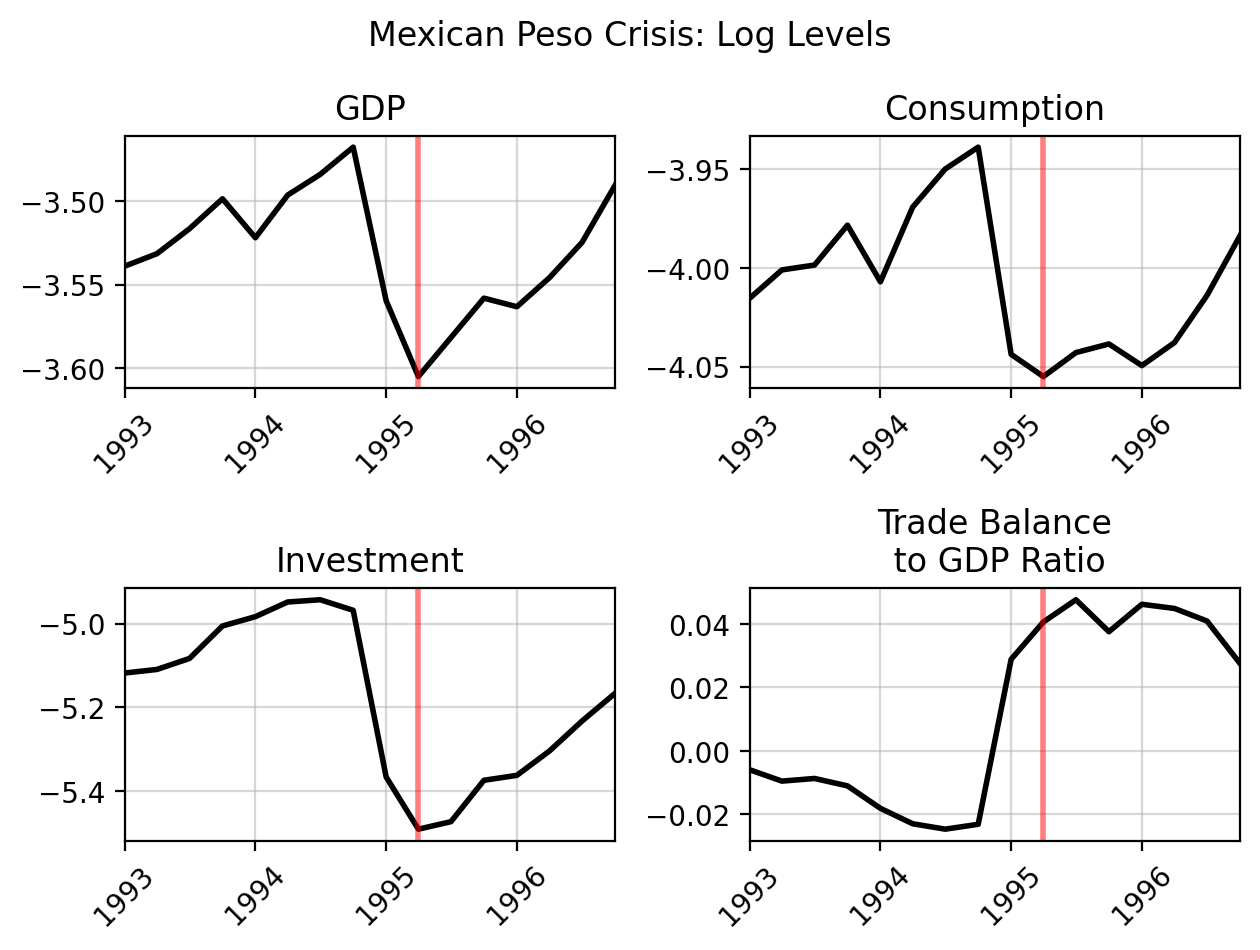

In [13]:
fig = plt.figure()

plt.suptitle("Mexican Peso Crisis: Log Levels")

ax = plt.subplot(221)
ax.plot(peso_crisis['time'], peso_crisis['GDP'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(peso_crisis['time'], peso_crisis['C'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(peso_crisis['time'], peso_crisis['I'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(peso_crisis['time'], peso_crisis['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [16]:
ymax = 2013
ymin = 2005

crisis = pd.to_datetime('2008Q2')
opt_crisis = {'linewidth':2, 'color':'red', 'alpha':0.5}
drange = pd.date_range(str(ymin), str(ymax + 1), freq='YS')
great_recession = (df.copy().query("country == 'Mexico'")
                   .query('Y <= @ymax')
                   .query('Y >= @ymin'))

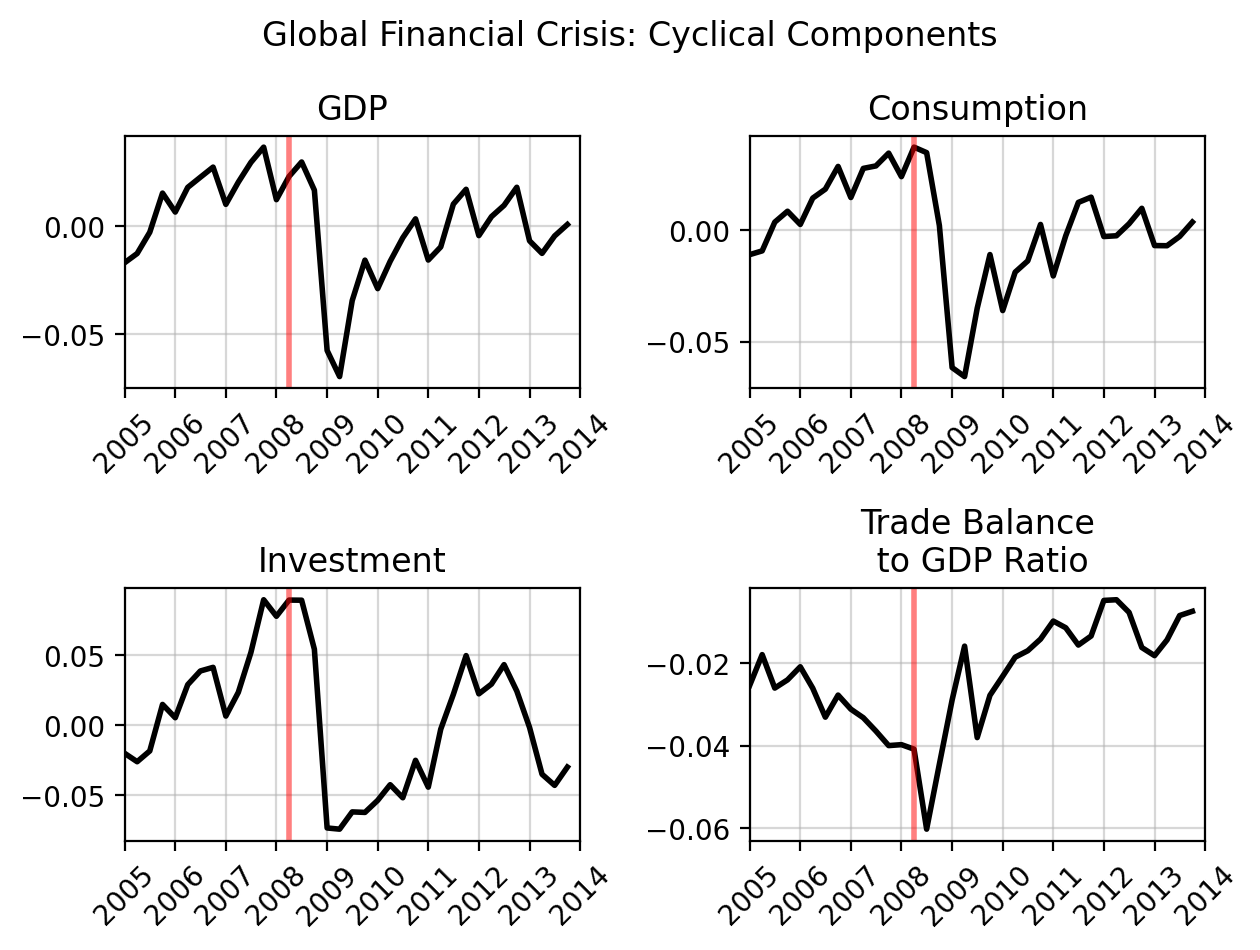

In [17]:
fig = plt.figure()

plt.suptitle("Global Financial Crisis: Cyclical Components")

ax = plt.subplot(221)
ax.plot(great_recession['time'], great_recession['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(great_recession['time'], great_recession['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(great_recession['time'], great_recession['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(great_recession['time'], great_recession['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

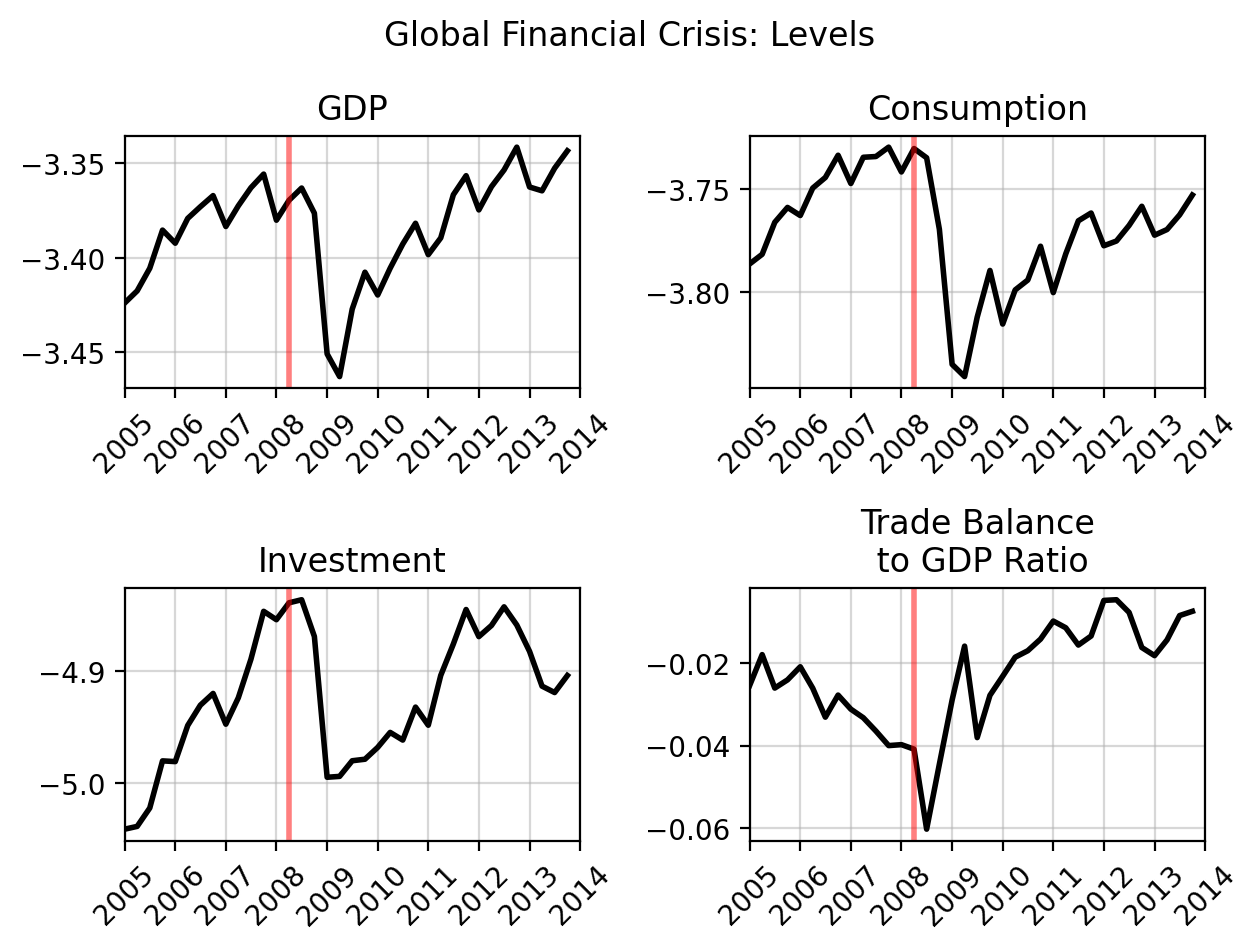

In [18]:
fig = plt.figure()

plt.suptitle("Global Financial Crisis: Levels")

ax = plt.subplot(221)
ax.plot(great_recession['time'], great_recession['GDP'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(great_recession['time'], great_recession['C'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(great_recession['time'], great_recession['I'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(great_recession['time'], great_recession['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [31]:
ymin = 2017
ymax = 2021

crisis = pd.to_datetime('2020Q2')
opt_crisis = {'linewidth':2, 'color':'red', 'alpha':0.5}
drange = pd.date_range(str(ymin), str(ymax + 1), freq='YS')
covid = (df.copy().query("country == 'Mexico'")
                   .query('Y <= @ymax')
                   .query('Y >= @ymin'))

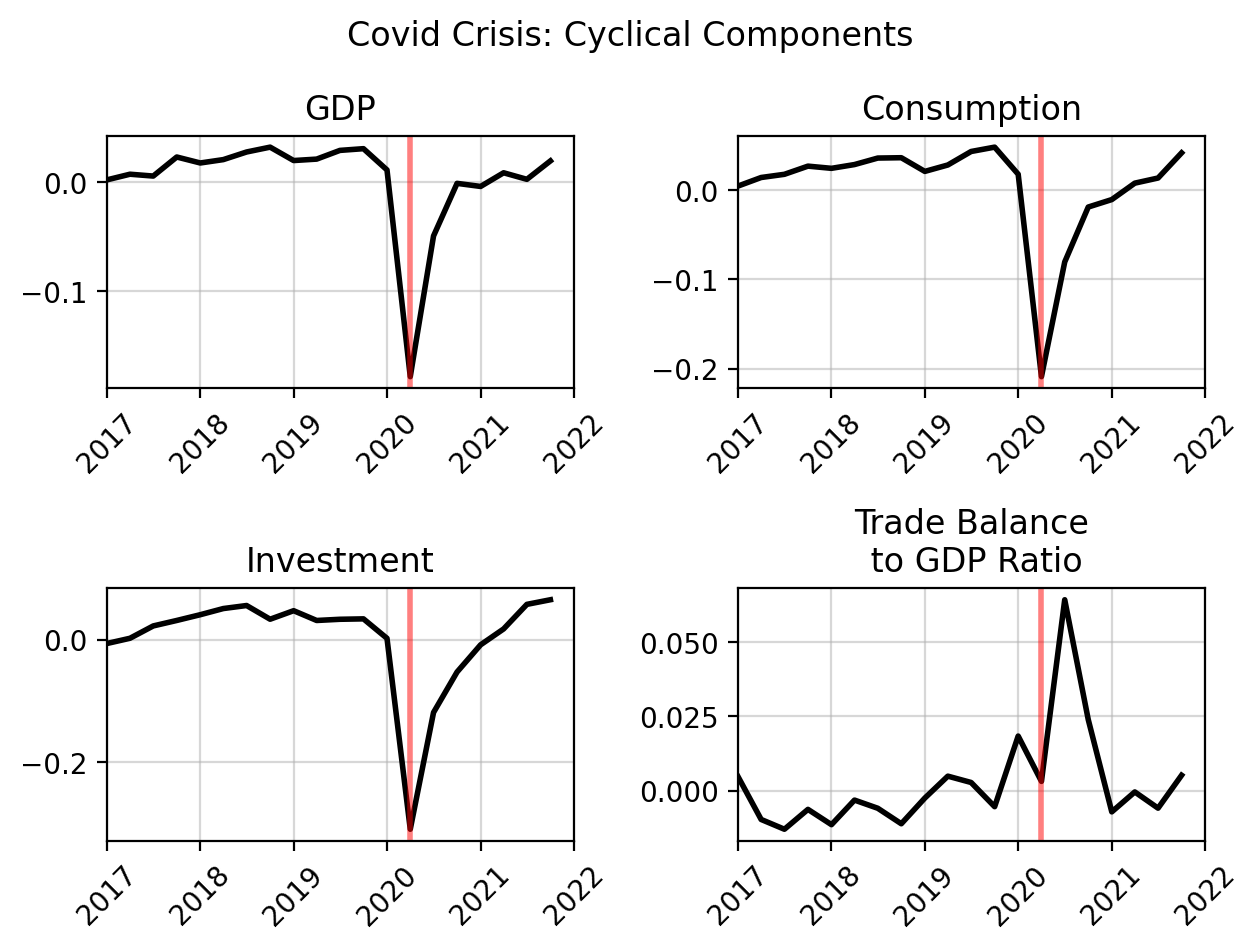

In [32]:
fig = plt.figure()

plt.suptitle("Covid Crisis: Cyclical Components")

ax = plt.subplot(221)
ax.plot(covid['time'], covid['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(covid['time'], covid['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(covid['time'], covid['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(covid['time'], covid['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

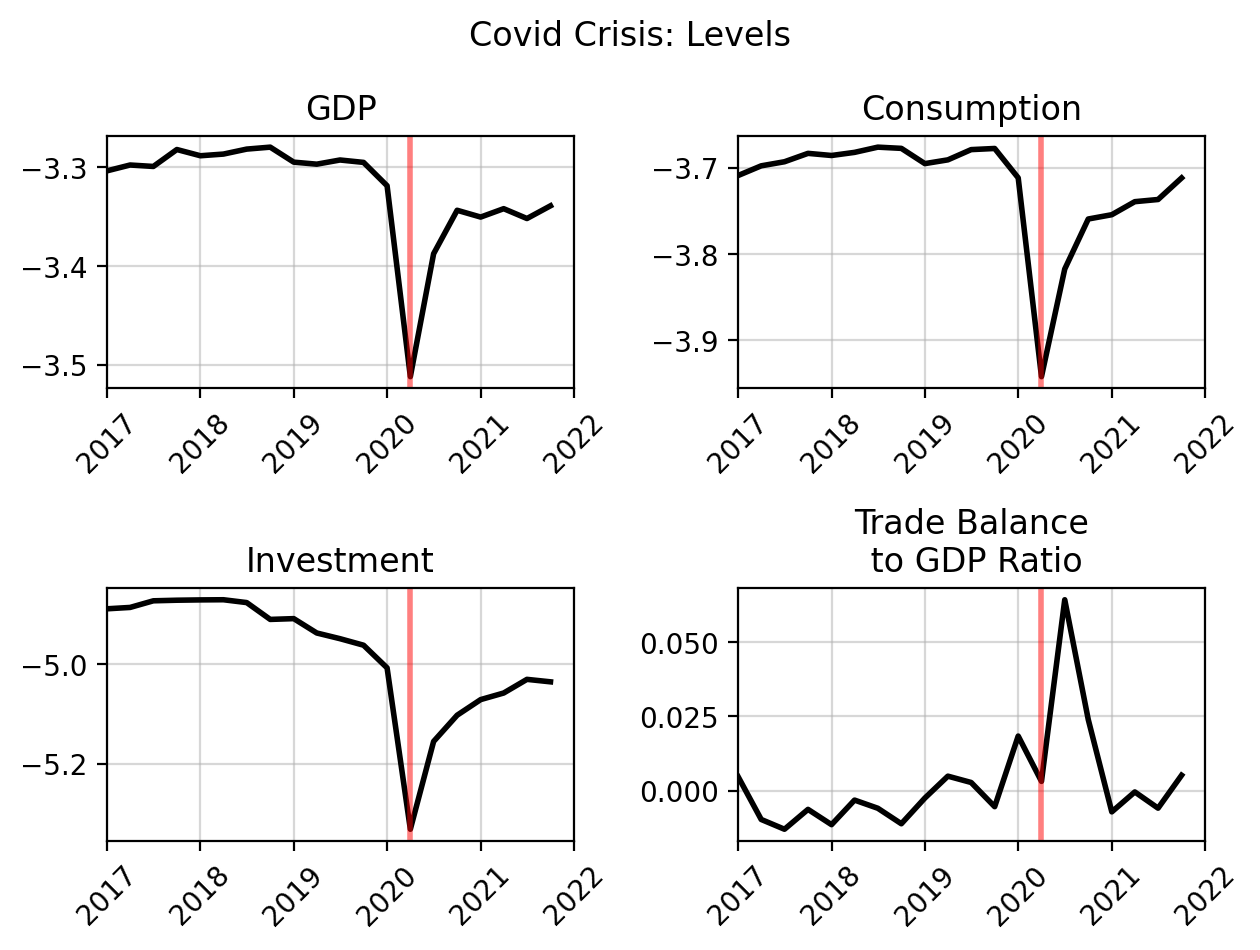

In [33]:
fig = plt.figure()

plt.suptitle("Covid Crisis: Levels")

ax = plt.subplot(221)
ax.plot(covid['time'], covid['GDP'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(covid['time'], covid['C'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(covid['time'], covid['I'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(covid['time'], covid['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))